<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/KMeans_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
iris_data=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Iris.csv',header=None)

In [ ]:
print(iris_data.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [ ]:
x=iris_data.iloc[:,0:4].values

In [ ]:
x.shape

(150, 4)

In [ ]:
y=iris_data.iloc[:,4].values

In [ ]:
y.shape

(150,)

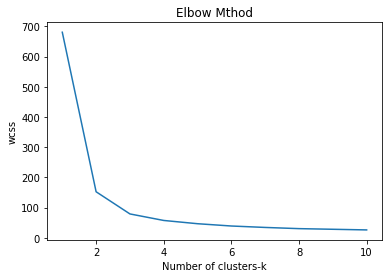

In [ ]:
#we will implement the elbow method to find the optimum number of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #predefined inertia_ value to be returned by machine

#plotting the results in line graph
plt.plot(range(1,11),wcss)
plt.title('Elbow Mthod')
plt.xlabel('Number of clusters-k')
plt.ylabel('wcss') #within cluster sum of squares
plt.show()

In [ ]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.93873974358974,
 34.198464618714624,
 30.23652404612931,
 28.115534535639803,
 25.996554473304478]

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(x)
y_kmeans
y_kmeans.shape

(150,)

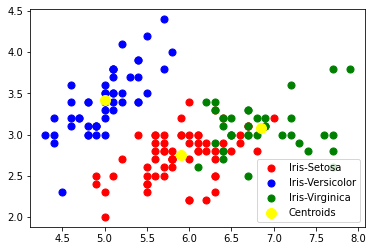

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=50, c='red', label='Iris-Setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=50, c='blue', label='Iris-Versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=50, c='green', label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

In [ ]:
kmeans.cluster_centers_[:,:] #cluster centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
kmeans.cluster_centers_[:,:].shape #3 is for the number of clusters we have taken and 4 is the number of features in x

(3, 4)